In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


In [2]:
base_path = "/kaggle/input/Cinema_Audience_Forecasting_challenge/"

booknow_booking = pd.read_csv(base_path + "booknow_booking/booknow_booking.csv")
cinepos_booking = pd.read_csv(base_path + "cinePOS_booking/cinePOS_booking.csv")
booknow_visits = pd.read_csv(base_path + "booknow_visits/booknow_visits.csv")
booknow_theaters = pd.read_csv(base_path + "booknow_theaters/booknow_theaters.csv")
cinepos_theaters = pd.read_csv(base_path + "cinePOS_theaters/cinePOS_theaters.csv")
relations = pd.read_csv(base_path + "movie_theater_id_relation/movie_theater_id_relation.csv")
date_info = pd.read_csv(base_path + "date_info/date_info.csv")
sample_submission = pd.read_csv(base_path + "sample_submission/sample_submission.csv")

print("Date info:", date_info.shape)
print("Bookings (BookNow):", booknow_booking.shape)
print("Bookings (CinePOS):", cinepos_booking.shape)
print("Visits (BookNow):", booknow_visits.shape)
print("Theaters (BookNow):", booknow_theaters.shape)
print("Theaters (CinePOS):", cinepos_theaters.shape)
print("Relations:", relations.shape)
print("Sample submission:", sample_submission.shape)

Date info: (547, 2)
Bookings (BookNow): (68336, 4)
Bookings (CinePOS): (1641966, 4)
Visits (BookNow): (214046, 3)
Theaters (BookNow): (829, 5)
Theaters (CinePOS): (4690, 5)
Relations: (150, 2)
Sample submission: (38062, 2)


In [3]:
print("Date Info:")
print(date_info.head(), "\n")

print("BookNow Bookings:")
print(booknow_booking.head(), "\n")

print("CinePOS Bookings:")
print(cinepos_booking.head(), "\n")

print("BookNow Visits:")
print(booknow_visits.head(), "\n")

print("BookNow Theaters:")
print(booknow_theaters.head(), "\n")

print("CinePOS Theaters:")
print(cinepos_theaters.head(), "\n")

print("Relations:")
print(relations.head(), "\n")

print("Sample Submission:")
print(sample_submission.head(), "\n")


Date Info:
    show_date day_of_week
0  2023-01-01      Sunday
1  2023-01-02      Monday
2  2023-01-03     Tuesday
3  2023-01-04   Wednesday
4  2023-01-05    Thursday 

BookNow Bookings:
  book_theater_id        show_datetime     booking_datetime  tickets_booked
0      book_00244  2023-01-01 19:00:00  2023-01-01 16:00:00               1
1      book_00740  2023-01-01 19:00:00  2023-01-01 19:00:00               3
2      book_00740  2023-01-01 19:00:00  2023-01-01 19:00:00               6
3      book_00244  2023-01-01 20:00:00  2023-01-01 16:00:00               2
4      book_00151  2023-01-01 20:00:00  2023-01-01 01:00:00               5 

CinePOS Bookings:
  cine_theater_id        show_datetime     booking_datetime  tickets_sold
0   cinePOS_00001  2023-01-01 11:00:00  2023-01-01 09:00:00             1
1   cinePOS_00002  2023-01-01 13:00:00  2023-01-01 06:00:00             3
2   cinePOS_00003  2023-01-01 16:00:00  2023-01-01 14:00:00             2
3   cinePOS_00004  2023-01-01 17:00:00  2

In [4]:
# Check the isnull values in df
print(date_info.isnull().sum())
print(booknow_booking.isnull().sum())
print(cinepos_booking.isnull().sum())
print(booknow_visits.isnull().sum())
print(booknow_theaters.isnull().sum())
print(cinepos_theaters.isnull().sum())
print(relations.isnull().sum())

show_date      0
day_of_week    0
dtype: int64
book_theater_id     0
show_datetime       0
booking_datetime    0
tickets_booked      0
dtype: int64
cine_theater_id     0
show_datetime       0
booking_datetime    0
tickets_sold        0
dtype: int64
book_theater_id    0
show_date          0
audience_count     0
dtype: int64
book_theater_id    515
theater_type         0
theater_area         0
latitude             0
longitude            0
dtype: int64
cine_theater_id       0
theater_type          0
theater_area          0
latitude           3861
longitude          3861
dtype: int64
book_theater_id    0
cine_theater_id    0
dtype: int64


In [5]:
booknow_theaters = booknow_theaters.dropna(subset=['book_theater_id'])
# Replacing the null values by median
cinepos_theaters['latitude'] = cinepos_theaters['latitude'].fillna(cinepos_theaters['latitude'].median())
cinepos_theaters['longitude'] = cinepos_theaters['longitude'].fillna(cinepos_theaters['longitude'].median())

In [6]:
print(date_info.isnull().sum())
print(booknow_booking.isnull().sum())
print(cinepos_booking.isnull().sum())
print(booknow_visits.isnull().sum())
print(booknow_theaters.isnull().sum())
print(cinepos_theaters.isnull().sum())
print(relations.isnull().sum())

show_date      0
day_of_week    0
dtype: int64
book_theater_id     0
show_datetime       0
booking_datetime    0
tickets_booked      0
dtype: int64
cine_theater_id     0
show_datetime       0
booking_datetime    0
tickets_sold        0
dtype: int64
book_theater_id    0
show_date          0
audience_count     0
dtype: int64
book_theater_id    0
theater_type       0
theater_area       0
latitude           0
longitude          0
dtype: int64
cine_theater_id    0
theater_type       0
theater_area       0
latitude           0
longitude          0
dtype: int64
book_theater_id    0
cine_theater_id    0
dtype: int64


In [7]:
# Milestone 1
train_data = booknow_visits.copy()

In [8]:
mean_audience = train_data.groupby('book_theater_id')['audience_count'].mean().reset_index()
mean_audience = mean_audience.rename(columns={'audience_count':'predicted_audience'})

In [9]:
sample_submission['book_theater_id'] = sample_submission['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))
sample_submission['show_date'] = sample_submission['ID'].apply(lambda x: x.split('_')[2])

submission = pd.merge(sample_submission, mean_audience, on='book_theater_id', how='left')
submission['predicted_audience'] = submission['predicted_audience'].fillna(train_data['audience_count'].mean())
submission_final = submission[['ID','predicted_audience']].rename(columns={'predicted_audience':'audience_count'})

print(submission_final.shape) 
submission_final.to_csv('/kaggle/working/submission.csv', index=False)


(38062, 2)


In [10]:
print(sample_submission.head())
print(sample_submission.shape)

                      ID  audience_count book_theater_id   show_date
0  book_00001_2024-03-01               0      book_00001  2024-03-01
1  book_00001_2024-03-02               0      book_00001  2024-03-02
2  book_00001_2024-03-03               0      book_00001  2024-03-03
3  book_00001_2024-03-04               0      book_00001  2024-03-04
4  book_00001_2024-03-06               0      book_00001  2024-03-06
(38062, 4)


In [11]:
booknow_booking['show_date'] = pd.to_datetime(booknow_booking['show_datetime']).dt.date
booknow_booking['booking_date'] = pd.to_datetime(booknow_booking['booking_datetime']).dt.date

same_day = booknow_booking[booknow_booking['show_date'] == booknow_booking['booking_date']]
print(len(same_day))


20433


In [12]:
date_info['show_date'] = pd.to_datetime(date_info['show_date'])
unique_months = date_info['show_date'].dt.to_period('M').nunique()
print(unique_months)


18


In [13]:
booknow_booking['show_day'] = pd.to_datetime(booknow_booking['show_datetime']).dt.day_name()
sunday_bookings = booknow_booking[booknow_booking['show_day'] == 'Sunday']
percentage = (len(sunday_bookings) / len(booknow_booking)) * 100
print(round(percentage, 2))


22.7


In [14]:
drama_mean_lat = booknow_theaters[booknow_theaters['theater_type'] == 'Drama']['latitude'].mean()
print(round(drama_mean_lat, 6))


23.063099


In [15]:
lat_range = booknow_theaters['latitude'].max() - booknow_theaters['latitude'].min()
print(round(lat_range, 4))


4.3235


In [16]:
cap_value = np.percentile(cinepos_booking['tickets_sold'], 95)
cap_value


14.0

In [17]:
categorical_cols = cinepos_theaters.select_dtypes(include='object').columns
print(categorical_cols)

cinepos_theaters_encoded = pd.get_dummies(cinepos_theaters, columns=categorical_cols)
cinepos_theaters_encoded.shape


Index(['cine_theater_id', 'theater_type', 'theater_area'], dtype='object')


(4690, 4814)

In [18]:
# Data preparation
booknow_booking['show_date'] = pd.to_datetime(booknow_booking['show_datetime']).dt.date.astype(str)
booknow_booking['show_hour'] = pd.to_datetime(booknow_booking['show_datetime']).dt.hour
booknow_booking['booking_date'] = pd.to_datetime(booknow_booking['booking_datetime']).dt.date.astype(str)
booknow_booking['booking_hour'] = pd.to_datetime(booknow_booking['booking_datetime']).dt.hour
booknow_booking['advance_hours'] = (pd.to_datetime(booknow_booking['show_datetime']) - pd.to_datetime(booknow_booking['booking_datetime'])).dt.total_seconds() / 3600
cinepos_booking['show_date'] = pd.to_datetime(cinepos_booking['show_datetime']).dt.date.astype(str)
cinepos_booking['show_hour'] = pd.to_datetime(cinepos_booking['show_datetime']).dt.hour
cinepos_booking['booking_date'] = pd.to_datetime(cinepos_booking['booking_datetime']).dt.date.astype(str)
cinepos_booking['booking_hour'] = pd.to_datetime(cinepos_booking['booking_datetime']).dt.hour
cinepos_booking['advance_hours'] = (pd.to_datetime(cinepos_booking['show_datetime']) - pd.to_datetime(cinepos_booking['booking_datetime'])).dt.total_seconds() / 3600
print("\nBooknow_booking\n",booknow_booking)
print("\nCinepos_booking\n",cinepos_booking)


Booknow_booking
       book_theater_id        show_datetime     booking_datetime  \
0          book_00244  2023-01-01 19:00:00  2023-01-01 16:00:00   
1          book_00740  2023-01-01 19:00:00  2023-01-01 19:00:00   
2          book_00740  2023-01-01 19:00:00  2023-01-01 19:00:00   
3          book_00244  2023-01-01 20:00:00  2023-01-01 16:00:00   
4          book_00151  2023-01-01 20:00:00  2023-01-01 01:00:00   
...               ...                  ...                  ...   
68331      book_00523  2024-02-28 23:00:00  2024-02-27 19:00:00   
68332      book_00073  2024-02-28 23:00:00  2024-02-19 07:00:00   
68333      book_00456  2024-02-28 23:00:00  2024-02-28 22:00:00   
68334      book_00388  2024-02-28 23:00:00  2024-02-23 16:00:00   
68335      book_00388  2024-02-28 23:00:00  2024-02-15 23:00:00   

       tickets_booked   show_date booking_date   show_day  show_hour  \
0                   1  2023-01-01   2023-01-01     Sunday         19   
1                   3  2023-01-01

In [19]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

booknow_agg = booknow_booking.groupby(['book_theater_id', 'show_date']).agg({
    'tickets_booked': ['sum', 'count', 'mean', 'std'],
    'show_hour': ['min', 'max', 'nunique'],
    'advance_hours': ['mean', 'max', 'min']
}).reset_index()
booknow_agg.columns = ['book_theater_id', 'show_date', 'total_tickets_bn', 'num_bookings_bn', 'avg_tickets_bn', 'std_tickets_bn', 'min_show_hour_bn', 'max_show_hour_bn', 'num_shows_bn', 'avg_advance_bn', 'max_advance_bn', 'min_advance_bn']
cinepos_agg = cinepos_booking.groupby(['cine_theater_id', 'show_date']).agg({
    'tickets_sold': ['sum', 'count', 'mean', 'std'],
    'show_hour': ['min', 'max', 'nunique'],
    'advance_hours': ['mean', 'max', 'min']
}).reset_index()
cinepos_agg.columns = ['cine_theater_id', 'show_date', 'total_tickets_cp', 'num_bookings_cp', 'avg_tickets_cp', 'std_tickets_cp', 'min_show_hour_cp', 'max_show_hour_cp', 'num_shows_cp', 'avg_advance_cp', 'max_advance_cp', 'min_advance_cp']
print("\nbooknow_agg\n",booknow_agg)
print("\ncinepos_agg\n",cinepos_agg)


booknow_agg
       book_theater_id   show_date  total_tickets_bn  num_bookings_bn  \
0          book_00004  2023-02-27                12                1   
1          book_00013  2023-01-04                 2                1   
2          book_00013  2023-01-08                 3                1   
3          book_00013  2023-01-09                25               12   
4          book_00013  2023-01-10                 5                2   
...               ...         ...               ...              ...   
21585      book_00819  2024-02-19                18                3   
21586      book_00819  2024-02-22                 8                2   
21587      book_00819  2024-02-26                 4                1   
21588      book_00819  2024-02-27                 4                1   
21589      book_00822  2023-11-10                 8                2   

       avg_tickets_bn  std_tickets_bn  min_show_hour_bn  max_show_hour_bn  \
0           12.000000             NaN       

In [20]:
booknow_visits['show_date'] = booknow_visits['show_date'].astype(str)
date_info['show_date'] = date_info['show_date'].astype(str)

merged_data = booknow_visits.merge(booknow_theaters, on='book_theater_id', how='left')
merged_data = merged_data.merge(relations, on='book_theater_id', how='left')
merged_data = merged_data.merge(date_info, on='show_date', how='left')
merged_data = merged_data.merge(booknow_agg, on=['book_theater_id', 'show_date'], how='left')
merged_data = merged_data.merge(cinepos_agg, on=['cine_theater_id', 'show_date'], how='left')
merged_data = merged_data.merge(cinepos_theaters[['cine_theater_id', 'theater_type', 'theater_area']], on='cine_theater_id', how='left', suffixes=('', '_cine'))
print("merged_data",merged_data)

merged_data        book_theater_id   show_date  audience_count theater_type theater_area  \
0           book_00001  2023-01-13              50        Drama     Area_002   
1           book_00001  2023-01-14              64        Drama     Area_002   
2           book_00001  2023-01-15              58        Drama     Area_002   
3           book_00001  2023-01-16              44        Drama     Area_002   
4           book_00001  2023-01-18              12        Drama     Area_002   
...                ...         ...             ...          ...          ...   
214041      book_00829  2024-02-23              16          NaN          NaN   
214042      book_00829  2024-02-24               8          NaN          NaN   
214043      book_00829  2024-02-25              16          NaN          NaN   
214044      book_00829  2024-02-27              16          NaN          NaN   
214045      book_00829  2024-02-28              16          NaN          NaN   

        latitude  longitude

In [21]:
merged_data['show_date'] = pd.to_datetime(merged_data['show_date'])
merged_data['year'] = merged_data['show_date'].dt.year
merged_data['month'] = merged_data['show_date'].dt.month
merged_data['day'] = merged_data['show_date'].dt.day
merged_data['day_of_year'] = merged_data['show_date'].dt.dayofyear
merged_data['week_of_year'] = merged_data['show_date'].dt.isocalendar().week
merged_data['is_weekend'] = merged_data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
merged_data['is_friday'] = (merged_data['day_of_week'] == 'Friday').astype(int)
merged_data

,book_theater_id,show_date,audience_count,theater_type,theater_area,latitude,longitude,cine_theater_id,day_of_week,total_tickets_bn,...,min_advance_cp,theater_type_cine,theater_area_cine,year,month,day,day_of_year,week_of_year,is_weekend,is_friday
0,book_00001,2023-01-13,50,Drama,Area_002,23.00441,79.934515,NaN,Friday,NaN,...,NaN,NaN,NaN,2023,1,13,13,2,0,1
1,book_00001,2023-01-14,64,Drama,Area_002,23.00441,79.934515,NaN,Saturday,NaN,...,NaN,NaN,NaN,2023,1,14,14,2,1,0
2,book_00001,2023-01-15,58,Drama,Area_002,23.00441,79.934515,NaN,Sunday,NaN,...,NaN,NaN,NaN,2023,1,15,15,2,1,0
3,book_00001,2023-01-16,44,Drama,Area_002,23.00441,79.934515,NaN,Monday,NaN,...,NaN,NaN,NaN,2023,1,16,16,3,0,0
4,book_00001,2023-01-18,12,Drama,Area_002,23.00441,79.934515,NaN,Wednesday,NaN,...,NaN,NaN,NaN,2023,1,18,18,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,NaN,NaN,NaN,NaN,NaN,Friday,NaN,...,NaN,NaN,NaN,2024,2,23,54,8,0,1
214042,book_00829,2024-02-24,8,NaN,NaN,NaN,NaN,NaN,Saturday,NaN,...,NaN,NaN,NaN,2024,2,24,55,8,1,0
214043,book_00829,2024-02-25,16,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,...,NaN,NaN,NaN,2024,2,25,56,8,1,0
214044,book_00829,2024-02-27,16,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,...,NaN,NaN,NaN,2024,2,27,58,9,0,0


In [22]:
# Mapping it circular
merged_data['month_sin'] = np.sin(2 * np.pi * merged_data['month'] / 12)
merged_data['month_cos'] = np.cos(2 * np.pi * merged_data['month'] / 12)

day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
merged_data['day_num'] = merged_data['day_of_week'].map(day_mapping)
merged_data['day_sin'] = np.sin(2 * np.pi * merged_data['day_num'] / 7)
merged_data['day_cos'] = np.cos(2 * np.pi * merged_data['day_num'] / 7)
merged_data

,book_theater_id,show_date,audience_count,theater_type,theater_area,latitude,longitude,cine_theater_id,day_of_week,total_tickets_bn,...,day,day_of_year,week_of_year,is_weekend,is_friday,month_sin,month_cos,day_num,day_sin,day_cos
0,book_00001,2023-01-13,50,Drama,Area_002,23.00441,79.934515,NaN,Friday,NaN,...,13,13,2,0,1,0.500000,0.866025,4,-0.433884,-0.900969
1,book_00001,2023-01-14,64,Drama,Area_002,23.00441,79.934515,NaN,Saturday,NaN,...,14,14,2,1,0,0.500000,0.866025,5,-0.974928,-0.222521
2,book_00001,2023-01-15,58,Drama,Area_002,23.00441,79.934515,NaN,Sunday,NaN,...,15,15,2,1,0,0.500000,0.866025,6,-0.781831,0.623490
3,book_00001,2023-01-16,44,Drama,Area_002,23.00441,79.934515,NaN,Monday,NaN,...,16,16,3,0,0,0.500000,0.866025,0,0.000000,1.000000
4,book_00001,2023-01-18,12,Drama,Area_002,23.00441,79.934515,NaN,Wednesday,NaN,...,18,18,3,0,0,0.500000,0.866025,2,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,NaN,NaN,NaN,NaN,NaN,Friday,NaN,...,23,54,8,0,1,0.866025,0.500000,4,-0.433884,-0.900969
214042,book_00829,2024-02-24,8,NaN,NaN,NaN,NaN,NaN,Saturday,NaN,...,24,55,8,1,0,0.866025,0.500000,5,-0.974928,-0.222521
214043,book_00829,2024-02-25,16,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,...,25,56,8,1,0,0.866025,0.500000,6,-0.781831,0.623490
214044,book_00829,2024-02-27,16,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,...,27,58,9,0,0,0.866025,0.500000,1,0.781831,0.623490


In [23]:
# Check the other days as holiday
holiday_dates = ['2023-01-26', '2023-03-08', '2023-03-22', '2023-04-07', '2023-04-14', '2023-05-01', '2023-06-29', '2023-08-15', '2023-09-19', '2023-10-02', '2023-10-24', '2023-11-12', '2023-11-14', '2023-11-27', '2023-12-25','2024-01-01', '2024-01-26', '2024-02-14', '2024-03-08', '2024-03-25', '2024-03-29', '2024-04-09', '2024-04-11', '2024-04-14', '2024-04-17', '2024-04-21', '2024-05-23', '2024-06-17', '2024-07-17', '2024-08-15', '2024-08-19', '2024-08-26', '2024-09-07', '2024-09-16', '2024-10-02', '2024-10-12', '2024-10-31', '2024-11-01', '2024-11-02', '2024-11-15', '2024-12-25']
merged_data['is_holiday'] = merged_data['show_date'].astype(str).isin(holiday_dates).astype(int)
merged_data

,book_theater_id,show_date,audience_count,theater_type,theater_area,latitude,longitude,cine_theater_id,day_of_week,total_tickets_bn,...,day_of_year,week_of_year,is_weekend,is_friday,month_sin,month_cos,day_num,day_sin,day_cos,is_holiday
0,book_00001,2023-01-13,50,Drama,Area_002,23.00441,79.934515,NaN,Friday,NaN,...,13,2,0,1,0.500000,0.866025,4,-0.433884,-0.900969,0
1,book_00001,2023-01-14,64,Drama,Area_002,23.00441,79.934515,NaN,Saturday,NaN,...,14,2,1,0,0.500000,0.866025,5,-0.974928,-0.222521,0
2,book_00001,2023-01-15,58,Drama,Area_002,23.00441,79.934515,NaN,Sunday,NaN,...,15,2,1,0,0.500000,0.866025,6,-0.781831,0.623490,0
3,book_00001,2023-01-16,44,Drama,Area_002,23.00441,79.934515,NaN,Monday,NaN,...,16,3,0,0,0.500000,0.866025,0,0.000000,1.000000,0
4,book_00001,2023-01-18,12,Drama,Area_002,23.00441,79.934515,NaN,Wednesday,NaN,...,18,3,0,0,0.500000,0.866025,2,0.974928,-0.222521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,NaN,NaN,NaN,NaN,NaN,Friday,NaN,...,54,8,0,1,0.866025,0.500000,4,-0.433884,-0.900969,0
214042,book_00829,2024-02-24,8,NaN,NaN,NaN,NaN,NaN,Saturday,NaN,...,55,8,1,0,0.866025,0.500000,5,-0.974928,-0.222521,0
214043,book_00829,2024-02-25,16,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,...,56,8,1,0,0.866025,0.500000,6,-0.781831,0.623490,0
214044,book_00829,2024-02-27,16,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,...,58,9,0,0,0.866025,0.500000,1,0.781831,0.623490,0


In [24]:
# NAN values occured after the left merge replace it by zero
for col in ['total_tickets_bn', 'num_bookings_bn', 'avg_tickets_bn', 'std_tickets_bn', 'num_shows_bn', 'avg_advance_bn', 'max_advance_bn', 'min_advance_bn', 'total_tickets_cp', 'num_bookings_cp', 'avg_tickets_cp', 'std_tickets_cp', 'num_shows_cp', 'avg_advance_cp', 'max_advance_cp', 'min_advance_cp']:
    if col in merged_data.columns:
        merged_data[col] = merged_data[col].fillna(0)

In [25]:
theater_stats = merged_data.groupby('book_theater_id')['audience_count'].agg(['mean', 'std', 'median', 'min', 'max']).reset_index()
theater_stats.columns = ['book_theater_id', 'theater_avg', 'theater_std', 'theater_median', 'theater_min', 'theater_max']
merged_data = merged_data.merge(theater_stats, on='book_theater_id', how='left')
merged_data

,book_theater_id,show_date,audience_count,theater_type,theater_area,latitude,longitude,cine_theater_id,day_of_week,total_tickets_bn,...,month_cos,day_num,day_sin,day_cos,is_holiday,theater_avg,theater_std,theater_median,theater_min,theater_max
0,book_00001,2023-01-13,50,Drama,Area_002,23.00441,79.934515,NaN,Friday,0.0,...,0.866025,4,-0.433884,-0.900969,0,47.058480,23.388397,46.0,2,122
1,book_00001,2023-01-14,64,Drama,Area_002,23.00441,79.934515,NaN,Saturday,0.0,...,0.866025,5,-0.974928,-0.222521,0,47.058480,23.388397,46.0,2,122
2,book_00001,2023-01-15,58,Drama,Area_002,23.00441,79.934515,NaN,Sunday,0.0,...,0.866025,6,-0.781831,0.623490,0,47.058480,23.388397,46.0,2,122
3,book_00001,2023-01-16,44,Drama,Area_002,23.00441,79.934515,NaN,Monday,0.0,...,0.866025,0,0.000000,1.000000,0,47.058480,23.388397,46.0,2,122
4,book_00001,2023-01-18,12,Drama,Area_002,23.00441,79.934515,NaN,Wednesday,0.0,...,0.866025,2,0.974928,-0.222521,0,47.058480,23.388397,46.0,2,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,NaN,NaN,NaN,NaN,NaN,Friday,0.0,...,0.500000,4,-0.433884,-0.900969,0,11.147368,5.213877,12.0,2,50
214042,book_00829,2024-02-24,8,NaN,NaN,NaN,NaN,NaN,Saturday,0.0,...,0.500000,5,-0.974928,-0.222521,0,11.147368,5.213877,12.0,2,50
214043,book_00829,2024-02-25,16,NaN,NaN,NaN,NaN,NaN,Sunday,0.0,...,0.500000,6,-0.781831,0.623490,0,11.147368,5.213877,12.0,2,50
214044,book_00829,2024-02-27,16,NaN,NaN,NaN,NaN,NaN,Tuesday,0.0,...,0.500000,1,0.781831,0.623490,0,11.147368,5.213877,12.0,2,50


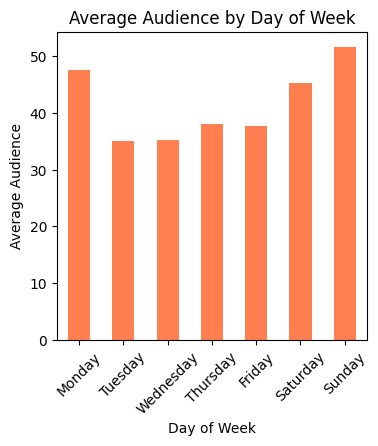

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_data.groupby('day_of_week')['audience_count'].mean().reindex(day_order).plot(kind='bar', color='coral')
plt.xlabel('Day of Week')
plt.ylabel('Average Audience')
plt.title('Average Audience by Day of Week')
plt.xticks(rotation=45)
plt.show()

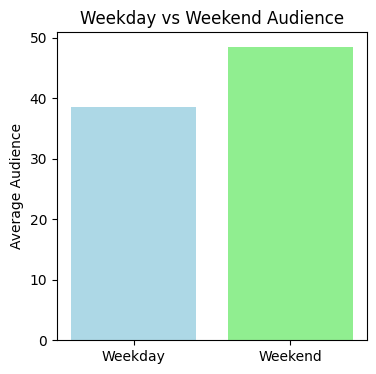

In [27]:
plt.figure(figsize=(4,4))
weekend_data = merged_data.groupby('is_weekend')['audience_count'].mean()
plt.bar(['Weekday', 'Weekend'], weekend_data, color=['lightblue', 'lightgreen'])
plt.ylabel('Average Audience')
plt.title('Weekday vs Weekend Audience')
plt.show()

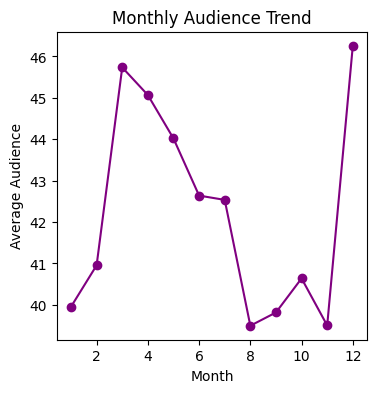

In [28]:
plt.figure(figsize=(4,4))
merged_data.groupby('month')['audience_count'].mean().plot(kind='line', marker='o', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Audience')
plt.title('Monthly Audience Trend')
plt.show()

In [29]:
# Time series feature engineering
merged_data = merged_data.sort_values(['book_theater_id', 'show_date'])
for lag in [1, 2, 3, 7, 14]:
    merged_data[f'lag_{lag}'] = merged_data.groupby('book_theater_id')['audience_count'].shift(lag)
for window in [3, 7, 14]:
    merged_data[f'rolling_mean_{window}'] = merged_data.groupby('book_theater_id')['audience_count'].transform(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
    merged_data[f'rolling_std_{window}'] = merged_data.groupby('book_theater_id')['audience_count'].transform(lambda x: x.shift(1).rolling(window, min_periods=1).std())

In [30]:
from sklearn.preprocessing import LabelEncoder
le_day = LabelEncoder()
le_theater_type = LabelEncoder()
le_area = LabelEncoder()
merged_data['day_of_week_encoded'] = le_day.fit_transform(merged_data['day_of_week'])
merged_data['theater_type_encoded'] = le_theater_type.fit_transform(merged_data['theater_type'].fillna('Unknown'))
merged_data['theater_area_encoded'] = le_area.fit_transform(merged_data['theater_area'].fillna('Unknown'))

In [31]:
# Selection of features
features_to_use = ['year', 'month', 'day', 'day_of_year', 'week_of_year','month_sin', 'month_cos', 'day_sin', 'day_cos', 'is_weekend', 'is_friday', 'is_holiday', 'day_of_week_encoded', 'theater_type_encoded', 'theater_area_encoded', 'latitude', 'longitude', 'total_tickets_bn', 'num_bookings_bn', 'avg_tickets_bn', 'std_tickets_bn', 'num_shows_bn', 'avg_advance_bn', 'max_advance_bn', 'min_advance_bn', 'total_tickets_cp', 'num_bookings_cp', 'avg_tickets_cp', 'std_tickets_cp', 'num_shows_cp', 'avg_advance_cp', 'max_advance_cp', 'min_advance_cp', 'theater_avg', 'theater_std', 'theater_median', 'theater_min', 'theater_max', 'lag_1', 'lag_2', 'lag_3', 'lag_7', 'lag_14', 'rolling_mean_3', 'rolling_std_3', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14', 'rolling_std_14']
len(features_to_use)

49

In [32]:
train_data = merged_data.dropna(subset=['audience_count'] + features_to_use)
X = train_data[features_to_use]
y = train_data['audience_count']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
y_pred_baseline = pipeline_lr.predict(X_val)
baseline_mae = mean_absolute_error(y_val, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_val, y_pred_baseline))
print(f'Baseline Linear Regression - MAE: {baseline_mae:.2f}, RMSE: {baseline_rmse:.2f}')

Baseline Linear Regression - MAE: 16.66, RMSE: 24.31


In [36]:
# Ridge Regression
from sklearn.linear_model import Ridge

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(random_state=42))
])
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_val)
ridge_mae = mean_absolute_error(y_val, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
print(f'Ridge Regression - MAE: {ridge_mae:.2f}, RMSE: {ridge_rmse:.2f}')

Ridge Regression - MAE: 16.71, RMSE: 24.35


In [37]:
# Lasso Regression
from sklearn.linear_model import Lasso

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=1.0, random_state=42, max_iter=2000))
])

pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_val)
lasso_mae = mean_absolute_error(y_val, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lasso))
print(f'Lasso Regression - MAE: {lasso_mae:.2f}, RMSE: {lasso_rmse:.2f}')

Lasso Regression - MAE: 17.04, RMSE: 24.84


In [38]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
rf_mae = mean_absolute_error(y_val, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f'Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}')

Random Forest - MAE: 15.94, RMSE: 23.38


In [39]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
gb_mae = mean_absolute_error(y_val, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_val, y_pred_gb))
print(f'Gradient Boosting - MAE: {gb_mae:.2f}, RMSE: {gb_rmse:.2f}')

Gradient Boosting - MAE: 15.84, RMSE: 23.20


In [40]:
# Multi-Layer Perceptron - Neural Network
from sklearn.neural_network import MLPRegressor

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', 
                           solver='adam', max_iter=200, random_state=42, 
                           early_stopping=True))
])
pipeline_mlp.fit(X_train, y_train)
y_pred_mlp = pipeline_mlp.predict(X_val)
mlp_mae = mean_absolute_error(y_val, y_pred_mlp)
mlp_rmse = np.sqrt(mean_squared_error(y_val, y_pred_mlp))
print(f'MLP - MAE: {mlp_mae:.2f}, RMSE: {mlp_rmse:.2f}')

MLP - MAE: 15.90, RMSE: 23.36


MODEL PERFORMANCE ANALYSIS

Model Performance Summary (sorted by MAE):
            Model       MAE      RMSE
Gradient Boosting 15.841956 23.203155
              MLP 15.899511 23.359378
    Random Forest 15.936779 23.376088
               LR 16.658879 24.306304
            Ridge 16.707528 24.352812
            Lasso 17.035629 24.844763
KEY INSIGHTS:
1. Best performing model: Gradient Boosting with MAE of 15.84
2. Worst performing model: Lasso with MAE of 17.04
3. Performance improvement: 7.0% from worst to best
4. Average ensemble model MAE: 15.89
5. Average linear model MAE: 16.87
6. Ensemble models perform 5.8% better than linear models


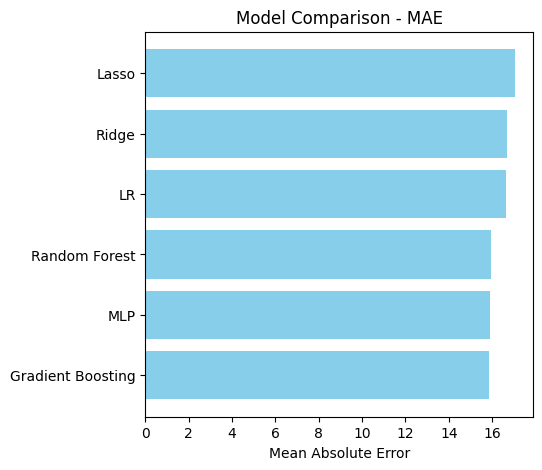

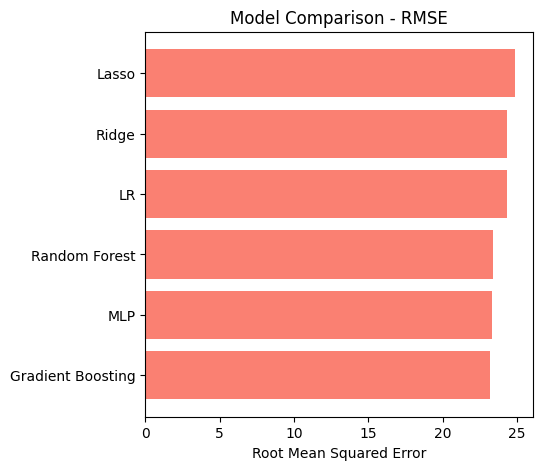

In [41]:
import matplotlib.pyplot as plt
print("MODEL PERFORMANCE ANALYSIS")
results = {'Model': ['LR', 'Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'MLP'], 'MAE': [baseline_mae, ridge_mae, lasso_mae, rf_mae, gb_mae, mlp_mae], 'RMSE': [baseline_rmse, ridge_rmse, lasso_rmse, rf_rmse, gb_rmse, mlp_rmse]}
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('MAE')
print("\nModel Performance Summary (sorted by MAE):")
print(results_df.to_string(index=False))
print("KEY INSIGHTS:")
best_model_name = results_df.iloc[0]['Model']
best_mae = results_df.iloc[0]['MAE']
worst_mae = results_df.iloc[-1]['MAE']
print(f"1. Best performing model: {best_model_name} with MAE of {best_mae:.2f}")
print(f"2. Worst performing model: {results_df.iloc[-1]['Model']} with MAE of {worst_mae:.2f}")
print(f"3. Performance improvement: {((worst_mae - best_mae) / worst_mae * 100):.1f}% from worst to best")
ensemble_models = results_df[results_df['Model'].isin(['Random Forest', 'Gradient Boosting'])]
print(f"4. Average ensemble model MAE: {ensemble_models['MAE'].mean():.2f}")
linear_models = results_df[results_df['Model'].isin(['Baseline LR', 'Ridge', 'Lasso'])]
print(f"5. Average linear model MAE: {linear_models['MAE'].mean():.2f}")
print(f"6. Ensemble models perform {((linear_models['MAE'].mean() - ensemble_models['MAE'].mean()) / linear_models['MAE'].mean() * 100):.1f}% better than linear models")

plt.figure(figsize=(5, 5))
plt.barh(results_df['Model'], results_df['MAE'], color='skyblue')
plt.xlabel('Mean Absolute Error')
plt.title('Model Comparison - MAE')
plt.show()

plt.figure(figsize=(5, 5))
plt.barh(results_df['Model'], results_df['RMSE'], color='salmon')
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison - RMSE')
plt.show()

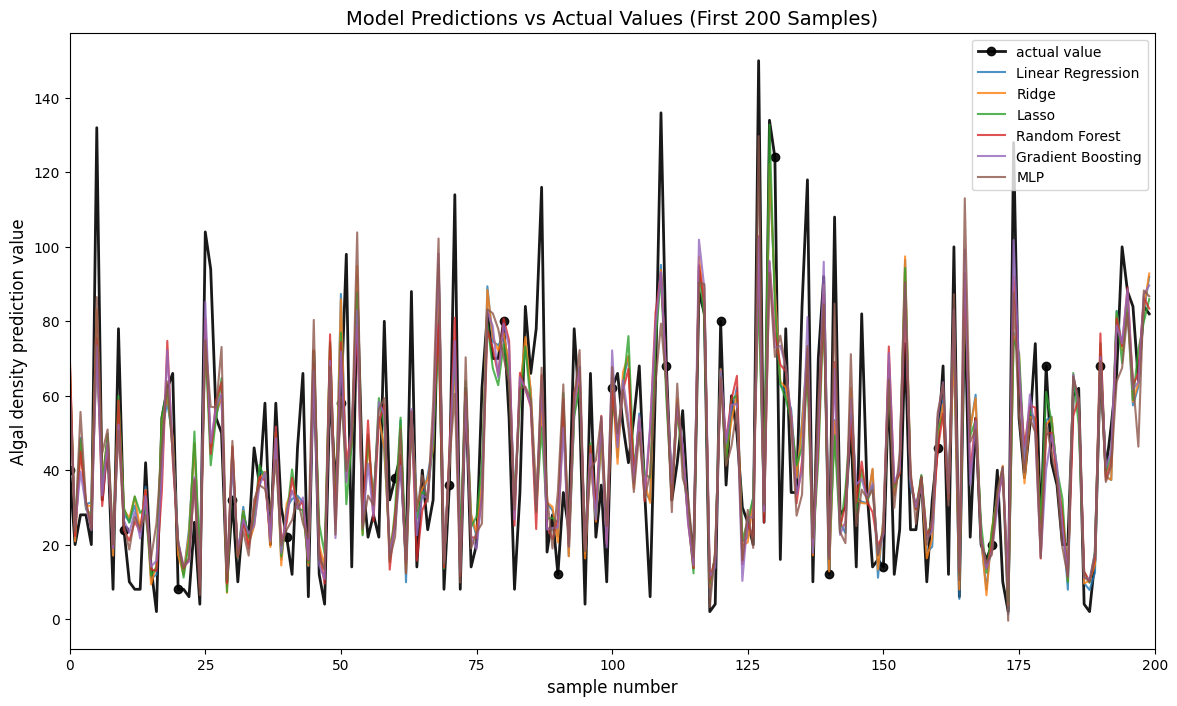

In [42]:
# comparison Actual values and predicted values of all models
n_samples = 200
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(range(n_samples), y_val[:n_samples], label='actual value', linewidth=2, color='black', marker='o', markevery=10, alpha=0.9)

ax.plot(range(n_samples), y_pred_baseline[:n_samples], label='Linear Regression', linewidth=1.5, alpha=0.8)
ax.plot(range(n_samples), y_pred_ridge[:n_samples], label='Ridge', linewidth=1.5, alpha=0.8)
ax.plot(range(n_samples), y_pred_lasso[:n_samples], label='Lasso',linewidth=1.5, alpha=0.8)
ax.plot(range(n_samples), y_pred_rf[:n_samples], label='Random Forest', linewidth=1.5, alpha=0.8)
ax.plot(range(n_samples), y_pred_gb[:n_samples], label='Gradient Boosting', linewidth=1.5, alpha=0.8)
ax.plot(range(n_samples), y_pred_mlp[:n_samples], label='MLP',linewidth=1.5, alpha=0.8)

ax.set_xlabel('sample number', fontsize=12)
ax.set_ylabel('Algal density prediction value', fontsize=12)
ax.set_title('Model Predictions vs Actual Values (First 200 Samples)',fontsize=14)
ax.legend()
ax.set_xlim(0, n_samples)

plt.show()

In [43]:
# Hyperparameter tuning of Gradient boosting
from sklearn.model_selection import GridSearchCV

gb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 5],
    'learning_rate': [0.05, 0.1]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

print(f"\nBEST PARAMETERS:")
for param, value in gb_grid.best_params_.items():
    print(f"   {param}: {value}")

print(f"\nBest Cross-Validation MAE: {-gb_grid.best_score_:.2f}")

gb_model_tuned = gb_grid.best_estimator_
y_pred_gb_tuned = gb_model_tuned.predict(X_val)
gb_tuned_mae = mean_absolute_error(y_val, y_pred_gb_tuned)
gb_tuned_rmse = np.sqrt(mean_squared_error(y_val, y_pred_gb_tuned))

print(f"\n GRADIENT BOOSTING RESULTS:")
print(f"   Original Parameters: n_estimators=100, max_depth=5, learning_rate=0.1")
print(f"   Original Performance: MAE = {gb_mae:.2f}, RMSE = {gb_rmse:.2f}")
print(f"   Tuned Parameters: {gb_grid.best_params_}")
print(f"   Tuned Performance: MAE = {gb_tuned_mae:.2f}, RMSE = {gb_tuned_rmse:.2f}")

improvement_gb = ((gb_mae - gb_tuned_mae) / gb_mae) * 100
print(f"   Improvement: {gb_mae - gb_tuned_mae:.2f} MAE points ({improvement_gb:.2f}%)")

Fitting 3 folds for each of 8 candidates, totalling 24 fits

BEST PARAMETERS:
   learning_rate: 0.1
   max_depth: 5
   n_estimators: 150

Best Cross-Validation MAE: 16.14

 GRADIENT BOOSTING RESULTS:
   Original Parameters: n_estimators=100, max_depth=5, learning_rate=0.1
   Original Performance: MAE = 15.84, RMSE = 23.20
   Tuned Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
   Tuned Performance: MAE = 15.76, RMSE = 23.13
   Improvement: 0.08 MAE points (0.49%)


In [44]:
# Hyperparameter tuning of Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print(f"\nBEST PARAMETERS:")
for param, value in rf_grid.best_params_.items():
    print(f"   {param}: {value}")

print(f"\nBest Cross-Validation MAE: {-rf_grid.best_score_:.2f}")

rf_model_tuned = rf_grid.best_estimator_
y_pred_rf_tuned = rf_model_tuned.predict(X_val)
rf_tuned_mae = mean_absolute_error(y_val, y_pred_rf_tuned)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf_tuned))

print(f"\nRANDOM FOREST RESULTS:")
print(f"   Original Parameters: n_estimators=50, max_depth=10")
print(f"   Original Performance: MAE = {rf_mae:.2f}, RMSE = {rf_rmse:.2f}")
print(f"")
print(f"   Tuned Parameters: {rf_grid.best_params_}")
print(f"   Tuned Performance: MAE = {rf_tuned_mae:.2f}, RMSE = {rf_tuned_rmse:.2f}")
print(f"")
improvement_rf = ((rf_mae - rf_tuned_mae) / rf_mae) * 100
print(f"   Improvement: {rf_mae - rf_tuned_mae:.2f} MAE points ({improvement_rf:.2f}%)")

Fitting 3 folds for each of 8 candidates, totalling 24 fits

BEST PARAMETERS:
   max_depth: 15
   min_samples_split: 5
   n_estimators: 100

Best Cross-Validation MAE: 15.97

RANDOM FOREST RESULTS:
   Original Parameters: n_estimators=50, max_depth=10
   Original Performance: MAE = 15.94, RMSE = 23.38

   Tuned Parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
   Tuned Performance: MAE = 15.44, RMSE = 22.83

   Improvement: 0.49 MAE points (3.09%)


In [45]:
# selecting the best model
if gb_tuned_mae < rf_tuned_mae:
    best_model = gb_model_tuned
else:
    best_model = rf_model_tuned
print(f"{best_model} as Final model")

RandomForestRegressor(max_depth=15, min_samples_split=5, n_jobs=-1,
                      random_state=42) as Final model


In [46]:
# Creating df of testing data
sample_submission['book_theater_id'] = sample_submission['ID'].str.split('_').str[:-1].str.join('_')
sample_submission['show_date'] = sample_submission['ID'].str.split('_').str[-1]

test_data = sample_submission[['book_theater_id', 'show_date']].copy()

test_data = test_data.merge(booknow_theaters, on='book_theater_id', how='left')
test_data = test_data.merge(relations, on='book_theater_id', how='left')
test_data = test_data.merge(date_info, on='show_date', how='left')

In [47]:
test_booknow_agg = booknow_booking[booknow_booking['show_date'] >= '2024-03-01'].groupby(['book_theater_id', 'show_date']).agg({'tickets_booked': ['sum', 'count', 'mean', 'std'], 'show_hour': ['min', 'max', 'nunique'], 'advance_hours': ['mean', 'max', 'min']}).reset_index()
test_booknow_agg.columns = ['book_theater_id', 'show_date', 'total_tickets_bn', 'num_bookings_bn', 'avg_tickets_bn', 'std_tickets_bn', 'min_show_hour_bn', 'max_show_hour_bn', 'num_shows_bn', 'avg_advance_bn', 'max_advance_bn', 'min_advance_bn']
test_cinepos_agg = cinepos_booking[cinepos_booking['show_date'] >= '2024-03-01'].groupby(['cine_theater_id', 'show_date']).agg({'tickets_sold': ['sum', 'count', 'mean', 'std'], 'show_hour': ['min', 'max', 'nunique'], 'advance_hours': ['mean', 'max', 'min']}).reset_index()
test_cinepos_agg.columns = ['cine_theater_id', 'show_date', 'total_tickets_cp', 'num_bookings_cp', 'avg_tickets_cp', 'std_tickets_cp', 'min_show_hour_cp', 'max_show_hour_cp', 'num_shows_cp', 'avg_advance_cp', 'max_advance_cp', 'min_advance_cp']
test_data = test_data.merge(test_booknow_agg, on=['book_theater_id', 'show_date'], how='left')
test_data = test_data.merge(test_cinepos_agg, on=['cine_theater_id', 'show_date'], how='left')
test_data = test_data.merge(cinepos_theaters[['cine_theater_id', 'theater_type', 'theater_area']], on='cine_theater_id', how='left', suffixes=('', '_cine'))

In [48]:
test_data['show_date'] = pd.to_datetime(test_data['show_date'])
test_data['year'] = test_data['show_date'].dt.year
test_data['month'] = test_data['show_date'].dt.month
test_data['day'] = test_data['show_date'].dt.day
test_data['day_of_year'] = test_data['show_date'].dt.dayofyear
test_data['week_of_year'] = test_data['show_date'].dt.isocalendar().week
test_data['is_weekend'] = test_data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
test_data['is_friday'] = (test_data['day_of_week'] == 'Friday').astype(int)
test_holiday_dates = ['2024-03-08', '2024-03-25', '2024-04-11', '2024-04-17', '2024-04-21', '2024-05-01', '2024-05-23', '2024-06-17', '2024-07-17', '2024-08-15', '2024-08-26', '2024-09-16', '2024-10-02', '2024-10-12', '2024-10-31', '2024-11-01', '2024-11-15', '2024-12-25']
test_data['is_holiday'] = test_data['show_date'].astype(str).isin(test_holiday_dates).astype(int)

test_data['month_sin'] = np.sin(2 * np.pi * test_data['month'] / 12)
test_data['month_cos'] = np.cos(2 * np.pi * test_data['month'] / 12)

test_data['day_num'] = test_data['day_of_week'].map(day_mapping)
test_data['day_sin'] = np.sin(2 * np.pi * test_data['day_num'] / 7)
test_data['day_cos'] = np.cos(2 * np.pi * test_data['day_num'] / 7)

In [49]:
for col in ['total_tickets_bn', 'num_bookings_bn', 'avg_tickets_bn', 'std_tickets_bn', 'num_shows_bn', 'avg_advance_bn', 'max_advance_bn', 'min_advance_bn', 'total_tickets_cp', 'num_bookings_cp', 'avg_tickets_cp', 'std_tickets_cp', 'num_shows_cp', 'avg_advance_cp', 'max_advance_cp', 'min_advance_cp']:
    if col in test_data.columns:
        test_data[col] = test_data[col].fillna(0)
test_data = test_data.merge(theater_stats, on='book_theater_id', how='left')
for col in ['theater_avg', 'theater_std', 'theater_median', 'theater_min', 'theater_max']:
    test_data[col] = test_data[col].fillna(train_data[col].mean())
    
last_known = merged_data.groupby('book_theater_id').tail(14)

In [50]:
for idx, row in test_data.iterrows():
    theater_history = last_known[last_known['book_theater_id'] == row['book_theater_id']].sort_values('show_date', ascending=False)
    for lag in [1, 2, 3, 7, 14]:
        if len(theater_history) >= lag:
            test_data.loc[idx, f'lag_{lag}'] = theater_history.iloc[lag-1]['audience_count']
        else:
            test_data.loc[idx, f'lag_{lag}'] = row['theater_avg']
    for window in [3, 7, 14]:
        if len(theater_history) >= window:
            test_data.loc[idx, f'rolling_mean_{window}'] = theater_history.head(window)['audience_count'].mean()
            test_data.loc[idx, f'rolling_std_{window}'] = theater_history.head(window)['audience_count'].std()
        else:
            test_data.loc[idx, f'rolling_mean_{window}'] = row['theater_avg']
            test_data.loc[idx, f'rolling_std_{window}'] = row['theater_std'] if pd.notna(row['theater_std']) else 0

for col in ['lag_1', 'lag_2', 'lag_3', 'lag_7', 'lag_14', 'rolling_mean_3', 'rolling_std_3', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14', 'rolling_std_14']:
    test_data[col] = test_data[col].fillna(test_data['theater_avg'])
for col in features_to_use:
    if col in test_data.columns and test_data[col].isnull().any():
        fill_value = test_data[col].median() if test_data[col].median() != 0 else 0
        test_data[col] = test_data[col].fillna(fill_value)

test_data['day_of_week_encoded'] = le_day.transform(test_data['day_of_week'])
test_data['theater_type_encoded'] = le_theater_type.transform(test_data['theater_type'].fillna('Unknown'))
test_data['theater_area_encoded'] = le_area.transform(test_data['theater_area'].fillna('Unknown'))

X_test = test_data[features_to_use]
predictions = best_model.predict(X_test)
predictions = np.maximum(predictions, 0)

In [51]:
# Submission of output
submission = pd.DataFrame({'ID': sample_submission['ID'], 'audience_count': predictions})
submission.to_csv('submission.csv', index=False)
print('Submitted')
print(submission.head(10))

Submitted
                      ID  audience_count
0  book_00001_2024-03-01       38.511725
1  book_00001_2024-03-02       57.212153
2  book_00001_2024-03-03       55.521358
3  book_00001_2024-03-04       37.723708
4  book_00001_2024-03-06       34.375020
5  book_00001_2024-03-07       39.234268
6  book_00001_2024-03-08       39.094662
7  book_00001_2024-03-09       57.859189
8  book_00001_2024-03-10       55.798341
9  book_00001_2024-03-11       37.658776
